In [0]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
import sys
#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [0]:
# reading data into dataframe
credit= pd.read_csv("CC_GENERAL.csv")

In [0]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [0]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [0]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", credit.isnull().sum().values.sum())



Missing values :   314


#### We could figure out that the Minnimum _payemnts columns has some missing values 

In [0]:
credit.shape

(8950, 18)

In [0]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [0]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)


In [0]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Generating Key Performance Indicators

***1. Monthly average purchase and cash advance amount***

In [0]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [0]:
print(credit['Monthly_avg_purchase'].head(),'\n ',
credit['TENURE'].head(),'\n', credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


In [0]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [0]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()#To count the number of ONEOFF_PURCHASES

4302

#### Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [0]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [0]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [0]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [0]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [0]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

### Converting them to categorical variables

In [0]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [0]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [0]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

### Limit_usage (balance to credit limit ratio ) credit card utilization

In [0]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1) #balance refers to the balnce of credit card 

In [0]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [0]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts() #isnull return 0 or 1 , Conclusion is that there are no null values 

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [0]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [0]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)# How much is the ratio between Payments and Minimum Payemnts 

In [0]:
credit['payment_minpay']
#credit.to_csv('credit.csv') 

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

####  Extreme value Treatment

In [0]:
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
cr_log.head

<bound method NDFrame.head of        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896 

In [0]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [0]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] #copying the rest of the coulmns into cr_pre

In [0]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [0]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

### Insights from KPIs

### Average payment_minpayment ratio for each purchse type.

In [0]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values
x.head

<bound method NDFrame.head of purchase_type
both_oneoff_installment     7.236982
installment                13.259004
none                       10.087451
one_off                     5.571082
dtype: float64>

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

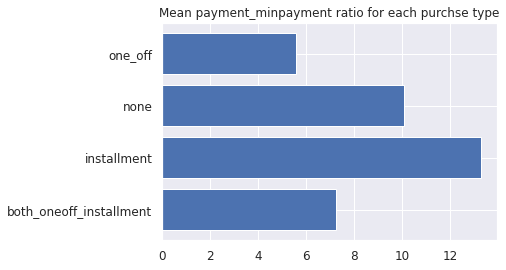

In [0]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


In [0]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


### Inference is that the Customer who purchase by EMI are good in payent of dues  

In [0]:
credit[credit['purchase_type']=='installment']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay
0,C10001,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,7.950000,0.000000,installment,0.040901,1.446508
5,C10006,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.0,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,111.106667,0.000000,installment,1.005460,0.581601
7,C10008,1823.652743,1.000000,436.20,0.0,436.20,0.000000,1.000000,0.0,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,36.350000,0.000000,installment,0.792892,1.276357
10,C10011,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.0,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12,76.676667,0.000000,installment,1.077604,0.498597
15,C10016,6886.213231,1.000000,1611.70,0.0,1611.70,2301.491267,0.500000,0.0,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12,134.308333,191.790939,installment,0.860777,0.944800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,C19182,5967.475270,0.833333,214.55,0.0,214.55,8555.409326,0.833333,0.0,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,35.758333,1425.901554,installment,0.663053,1.120950
8942,C19183,40.829749,1.000000,113.28,0.0,113.28,0.000000,1.000000,0.0,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,18.880000,0.000000,installment,0.040830,1.095102
8945,C19186,28.493517,1.000000,291.12,0.0,291.12,0.000000,1.000000,0.0,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,48.520000,0.000000,installment,0.028494,6.660231
8946,C19187,19.183215,1.000000,300.00,0.0,300.00,0.000000,1.000000,0.0,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.00,6,50.000000,0.000000,installment,0.019183,0.883197


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

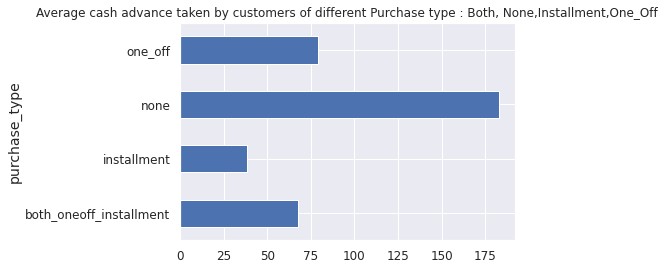

In [0]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

#### Customers who don't do either one-off or installment purchases take more cash on advance

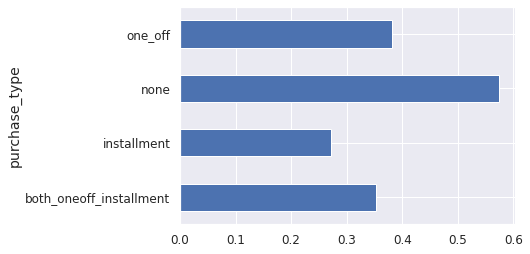

In [0]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

### One hot encoding categorial variable Purchase type

In [0]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [0]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [0]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [0]:
l=['purchase_type']

In [0]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [0]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [0]:
cr_dummy.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1


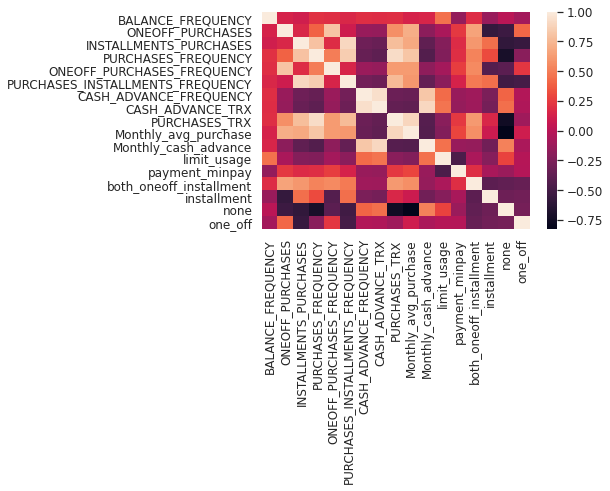

In [0]:
sns.heatmap(cr_dummy.corr())

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data 
- To put data on the same scale 

In [0]:
from sklearn.preprocessing import  StandardScaler

In [0]:
sc=StandardScaler()

In [0]:
cr_dummy.shape

(8950, 17)

In [0]:
cr_scaled=sc.fit_transform(cr_dummy)

In [0]:
cr_scaled

Output hidden; open in https://colab.research.google.com to view.

### Applying PCA for dimensionality reduction
##### With the help of principal component analysis we will reduce features

In [0]:
from sklearn.decomposition import PCA

In [0]:
cr_dummy.shape

(8950, 17)

In [0]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [0]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0

In [0]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [0]:
var_ratio

{2: 0.5826439793960287,
 3: 0.7299379309512697,
 4: 0.811544276235126,
 5: 0.8770555795291431,
 6: 0.9186492443512617,
 7: 0.9410925256030127,
 8: 0.9616114053683058,
 9: 0.9739787081990642,
 10: 0.9835896584630704,
 11: 0.9897248107341954,
 12: 0.9927550009135228,
 13: 0.9953907562385423,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

### Since 6 components are explaining about 90% variance so we select 6 components

In [0]:
pc=PCA(n_components=6)

In [0]:
p=pc.fit(cr_scaled)

In [0]:
cr_scaled.shape

(8950, 17)

In [0]:
p.explained_variance_

array([6.836, 3.07 , 2.504, 1.387, 1.114, 0.707])

In [0]:
np.sum(p.explained_variance_)

15.618782269308799

In [0]:
var_ratio

{2: 0.5826439793960287,
 3: 0.7299379309512697,
 4: 0.811544276235126,
 5: 0.8770555795291431,
 6: 0.9186492443512617,
 7: 0.9410925256030127,
 8: 0.9616114053683058,
 9: 0.9739787081990642,
 10: 0.9835896584630704,
 11: 0.9897248107341954,
 12: 0.9927550009135228,
 13: 0.9953907562385423,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

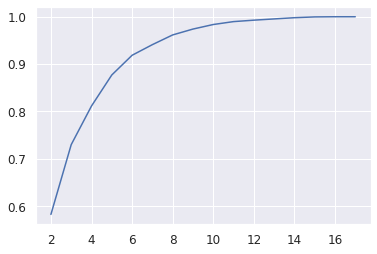

In [0]:
pd.Series(var_ratio).plot()

### Since 5 components are explaining about 87% variance so we select 5 components

In [0]:
cr_scaled.shape

(8950, 17)

In [0]:
pc_final=PCA(n_components=5).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [0]:
dd=pd.DataFrame(reduced_cr)

In [0]:
dd.head()

,0,1,2,3,4
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929
2,1.287396,1.508938,2.709966,-1.892252,0.010809
3,-1.047613,0.673103,2.501794,-1.306784,0.761348
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969


### So initially we had 17 variables now its 5 so our variable go reduced

In [0]:
dd.shape

(8950, 5)

In [0]:
col_list=cr_dummy.columns

In [0]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [0]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


### So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable bur in our case its not.

In [0]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

### Clustering

### **Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.**

In [0]:
from sklearn.cluster import KMeans

In [0]:
km_4=KMeans(n_clusters=4,random_state=123)

In [0]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [0]:
km_4.labels_

array([1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 3, 1, 3, 1, 0, 1, 1, 0,
       1, 0, 3, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 3, 3, 0, 2, 2, 3, 0, 2, 3,
       0, 0, 1, 3, 0, 2, 0, 0, 3, 2, 1, 2, 2, 0, 3, 1, 2, 2, 3, 2, 1, 0,
       3, 3, 0, 2, 1, 0, 3, 0, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 0, 2, 0, 0,
       2, 3, 0, 0, 2, 2, 2, 3, 2, 3, 1, 3, 2, 1, 0, 1, 3, 2, 1, 3, 0, 0,
       0, 3, 0, 3, 0, 0, 1, 3, 1, 3, 0, 2, 1, 3, 3, 2, 3, 0, 2, 3, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 3, 0, 2, 3, 3, 0, 0, 1, 3, 1, 0, 1, 0, 3, 0, 1, 3, 0, 3,
       2, 3, 0, 1, 0, 1, 3, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 3, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 3, 1, 2, 0, 1, 3, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 3, 3,
       3, 0, 2, 3, 0, 0, 2, 3, 1, 0, 2, 3, 2, 2, 2,

In [0]:
pd.Series(km_4.labels_).value_counts()

0    2758
1    2228
3    2090
2    1874
dtype: int64

### Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.



### Identify cluster Error.


In [0]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,133444.006425
1,2,87025.940410
2,3,64499.837036
3,4,43508.398870
4,5,36826.483543
5,6,32005.255440
6,7,29162.511164
7,8,26104.852650
8,9,23881.660507
9,10,22087.664038


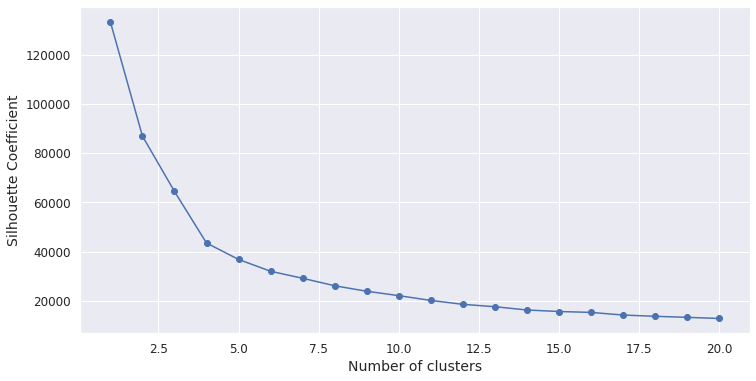

In [0]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### From above graph we will find elbow range. here it is 4,5,6

### Silhouette Coefficient

In [0]:
from sklearn import metrics

In [0]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [0]:
scores

[0.33990331391786605,
 0.37170354484067686,
 0.4592585517614622,
 0.4557969467390634,
 0.4504111951204949,
 0.4352815680689202,
 0.42695600451524646,
 0.38196189888346044,
 0.3632974733507123,
 0.35951904842540117,
 0.35238247202453943,
 0.3551958971225657,
 0.35862465771630614,
 0.3508991945635484,
 0.35123976136380475,
 0.34588223362320814,
 0.34775409606024144,
 0.3475780631446627,
 0.3390384835148836]

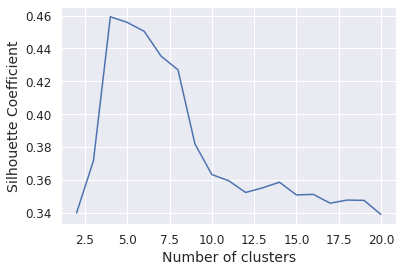

In [0]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

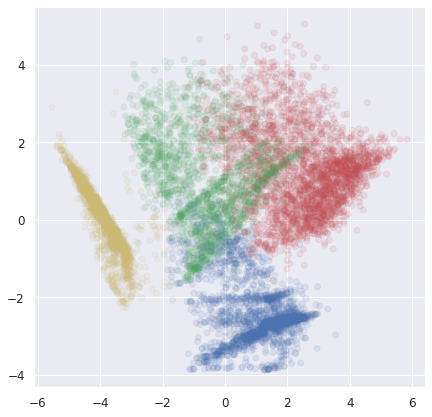

In [0]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

### It is very difficult to draw iddividual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps

In [0]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [0]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [0]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,1
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,3
2,1.287396,1.508938,2.709966,-1.892252,0.010809,2
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,2
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,2


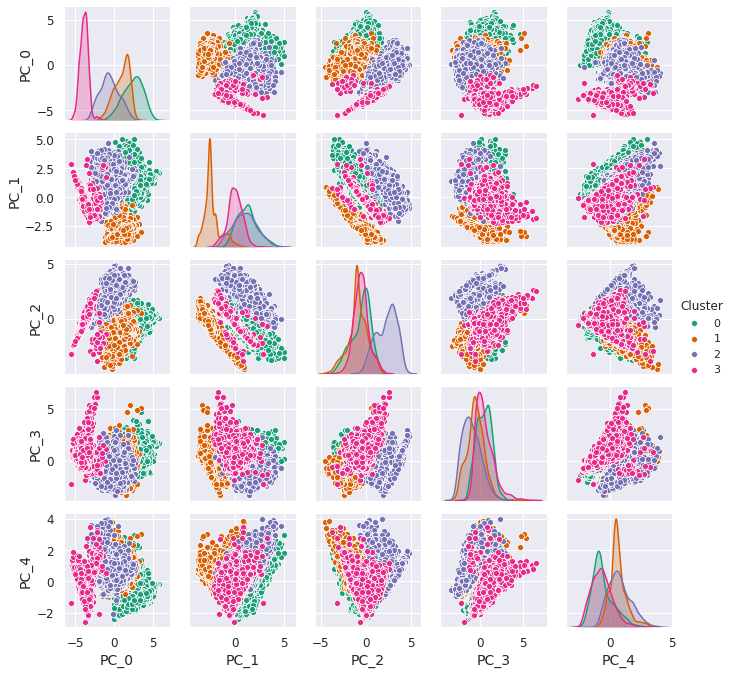

In [0]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### It shows that first two components are able to indentify clusters

#### Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them.¶
To interprate result we need to use our data frame

In [0]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [0]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [0]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [0]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,3
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,2
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,2


In [0]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,33.125453,12.053860,7.118997,0.045933
Monthly_avg_purchase,193.696083,47.573598,69.758276,0.159337
Monthly_cash_advance,67.620006,33.489846,77.843485,186.298043
limit_usage,0.354487,0.264275,0.378727,0.576217
CASH_ADVANCE_TRX,2.807107,1.019300,2.864995,6.552632
payment_minpay,7.268605,13.402660,5.561421,9.927979
both_oneoff_installment,1.000000,0.001795,0.003735,0.002392
installment,0.000000,0.998205,0.000000,0.017225
one_off,0.000000,0.000000,0.996265,0.003349
none,0.000000,0.000000,0.000000,0.977033


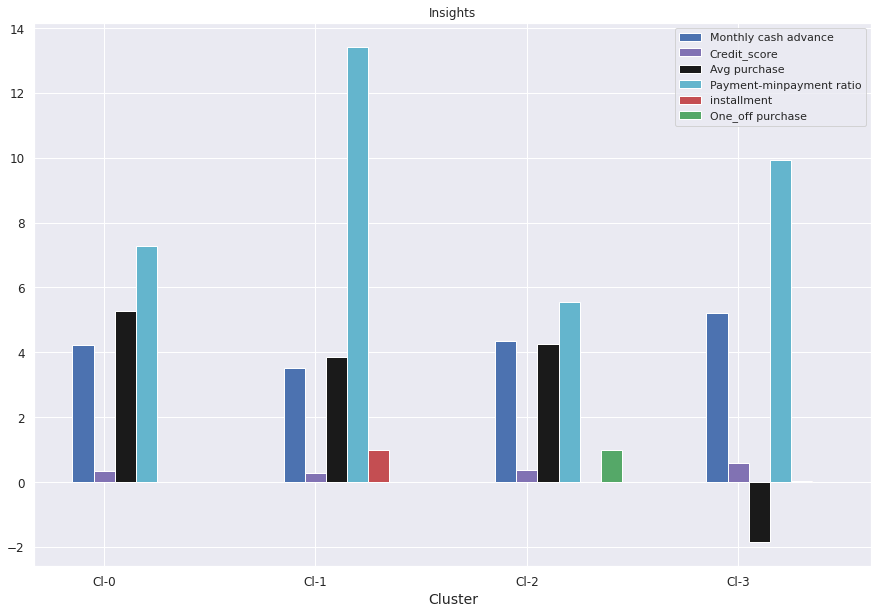

In [0]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

**Insights**

#### Clusters are clearly distinguishing behavior within customers




<big>


- Cluster 2 is the group of customers who have highest Monthly_avg purchases  *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment& doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have comparative good credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



In [0]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2758
1          1    2228
2          2    1874
3          3    2090
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2758   30.815642
1  2228   24.893855
2  1874   20.938547
3  2090   23.351955


In [0]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 1, 2, 2, 2, 4, 0, 4, 0, 2, 4, 2, 0, 0, 1, 4, 1, 4, 0, 4, 4, 3,
       4, 3, 1, 4, 2, 4, 3, 4, 3, 0, 2, 2, 4, 1, 1, 3, 2, 2, 1, 3, 2, 1,
       0, 3, 4, 1, 0, 2, 3, 0, 1, 2, 4, 2, 2, 0, 1, 4, 2, 2, 1, 2, 4, 0,
       1, 1, 0, 2, 4, 3, 1, 0, 0, 0, 2, 4, 1, 2, 0, 1, 0, 4, 0, 2, 3, 3,
       2, 1, 3, 3, 2, 2, 2, 1, 2, 1, 4, 1, 2, 4, 0, 4, 1, 2, 4, 1, 3, 3,
       0, 1, 3, 1, 0, 0, 4, 1, 4, 1, 3, 2, 4, 1, 1, 2, 1, 0, 2, 1, 2, 0,
       4, 2, 4, 0, 0, 3, 0, 2, 0, 1, 1, 0, 0, 2, 4, 2, 0, 0, 4, 0, 4, 3,
       0, 4, 3, 1, 0, 2, 1, 1, 0, 0, 4, 1, 4, 0, 4, 0, 1, 3, 4, 1, 3, 1,
       2, 1, 0, 4, 0, 4, 3, 2, 0, 4, 4, 0, 2, 2, 2, 2, 2, 4, 2, 0, 0, 0,
       2, 1, 2, 3, 4, 3, 0, 4, 2, 3, 3, 0, 3, 0, 1, 2, 4, 4, 0, 0, 3, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 4, 2, 2, 0, 2, 4, 0, 4, 0, 2, 0,
       0, 2, 0, 4, 0, 4, 3, 0, 2, 4, 4, 2, 1, 4, 2, 3, 4, 1, 2, 0, 0, 3,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 3, 2, 2, 2, 4, 0, 0, 4, 0, 0, 1, 1,
       1, 3, 2, 1, 0, 3, 2, 1, 4, 0, 2, 1, 2, 2, 2,

In [0]:
pd.Series(km_5.labels_).value_counts()

4    2130
1    2084
0    1985
2    1860
3     891
dtype: int64

Text(0, 0.5, 'PC_1')

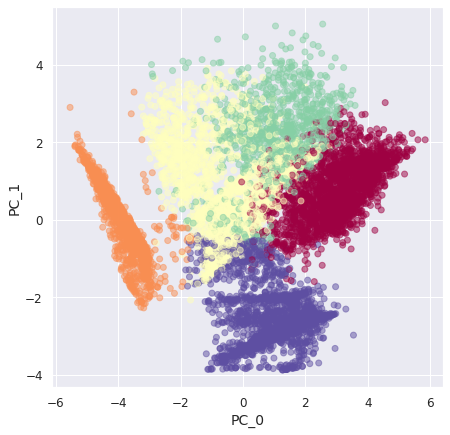

In [0]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [0]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [0]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,34.538035,0.035509,7.067742,27.536476,11.896714
Monthly_avg_purchase,209.814279,0.096572,68.685725,141.648931,47.239695
Monthly_cash_advance,3.996969,185.109488,73.635703,252.400192,19.154845
limit_usage,0.262694,0.576260,0.377563,0.594982,0.246825
CASH_ADVANCE_TRX,0.152645,6.454894,2.648387,10.519641,0.480282
payment_minpay,8.569707,9.950170,5.540102,3.920172,13.866212
both_oneoff_installment,1.000000,0.000000,0.003226,0.878788,0.000000
installment,0.000000,0.016795,0.000000,0.106622,1.000000
one_off,0.000000,0.003359,0.996774,0.014590,0.000000
none,0.000000,0.979846,0.000000,0.000000,0.000000


### Conclusion With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

***So we don't have quite distinguishable characteristics with 5 clusters,***

In [0]:

s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1985
1          1    2084
2          2    1860
3          3     891
4          4    2130
Name: Cluster_5, dtype: int64


In [0]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1985   22.178771
1  2084   23.284916
2  1860   20.782123
3   891    9.955307
4  2130   23.798883


### Finding behavior with 6 clusters

In [0]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 1, 4, 4, 4, 2, 0, 2, 0, 4, 2, 4, 0, 0, 1, 2, 1, 2, 0, 2, 2, 3,
       2, 3, 1, 2, 5, 2, 3, 2, 3, 0, 5, 4, 2, 1, 1, 3, 5, 5, 1, 3, 4, 1,
       0, 3, 2, 1, 0, 5, 3, 0, 1, 4, 2, 4, 5, 0, 1, 2, 4, 4, 1, 4, 2, 0,
       1, 1, 0, 4, 2, 3, 1, 0, 0, 0, 4, 2, 1, 5, 0, 1, 0, 2, 0, 4, 3, 3,
       5, 1, 3, 3, 5, 4, 4, 1, 4, 1, 2, 1, 4, 2, 0, 2, 1, 5, 2, 1, 3, 3,
       0, 1, 3, 1, 0, 0, 2, 1, 2, 1, 3, 4, 2, 1, 1, 4, 1, 0, 5, 1, 4, 0,
       2, 5, 2, 0, 0, 3, 0, 5, 0, 1, 1, 0, 0, 4, 2, 4, 0, 0, 2, 0, 2, 3,
       0, 2, 3, 1, 0, 5, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 3, 2, 1, 3, 1,
       5, 1, 0, 2, 0, 2, 3, 4, 0, 2, 2, 0, 5, 5, 4, 4, 4, 2, 4, 0, 0, 0,
       4, 1, 4, 3, 2, 3, 0, 2, 5, 3, 3, 0, 3, 0, 1, 4, 2, 2, 0, 0, 3, 0,
       0, 0, 4, 0, 4, 4, 0, 0, 1, 0, 0, 2, 4, 4, 0, 4, 2, 0, 2, 0, 5, 0,
       0, 4, 0, 2, 0, 2, 3, 0, 5, 2, 2, 4, 1, 2, 4, 3, 2, 1, 4, 0, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 5, 0, 0, 3, 4, 5, 4, 2, 0, 0, 2, 0, 0, 1, 1,
       1, 3, 4, 1, 0, 3, 4, 1, 2, 0, 5, 1, 4, 4, 5,

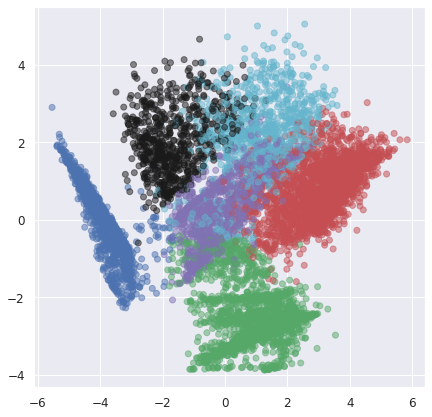

In [0]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [0]:
cluster_df_6 = pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [0]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,34.653320,0.033205,11.896762,27.742922,7.745148,5.980000
Monthly_avg_purchase,210.512330,0.098395,47.243825,140.643565,78.444637,54.143932
Monthly_cash_advance,3.942946,184.912834,19.155048,243.934772,3.654858,205.399766
limit_usage,0.262170,0.575884,0.246733,0.595784,0.244888,0.606433
CASH_ADVANCE_TRX,0.149012,6.435034,0.484280,10.057758,0.130802,7.632857
payment_minpay,8.610468,9.967837,13.861937,3.835641,6.898533,3.252112
both_oneoff_installment,1.000000,0.000000,0.000000,0.894677,0.009283,0.000000
installment,0.000000,0.017324,1.000000,0.105323,0.000000,0.000000
one_off,0.000000,0.000000,0.000000,0.000000,0.990717,1.000000
none,0.000000,0.982676,0.000000,0.000000,0.000000,0.000000


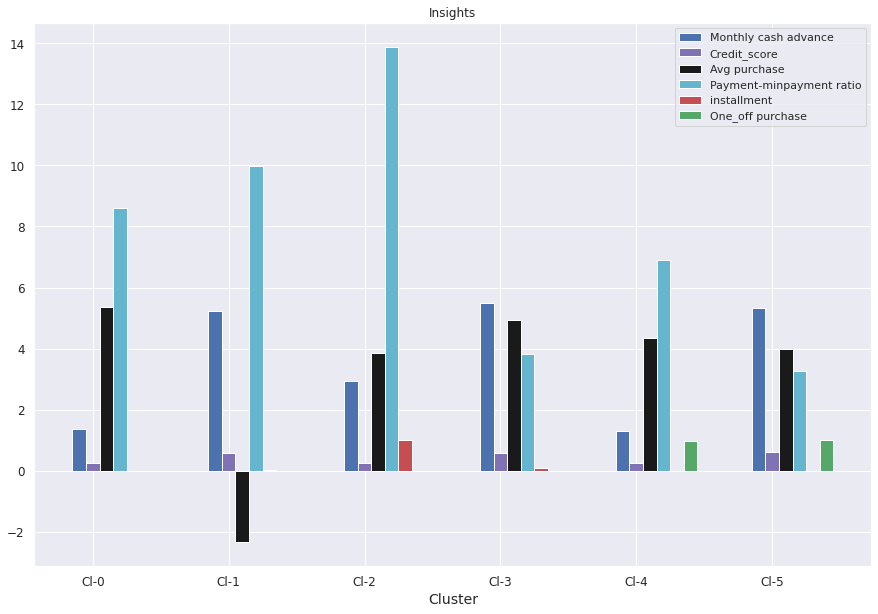

In [0]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [0]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([1.372, 5.22 , 2.953, 5.497, 1.296, 5.325])

### Conclusion with  6 clusters:

- Here also groups are overlapping.
     - Cl-0 and Cl-2 behaving same 

### Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [0]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score


In [0]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

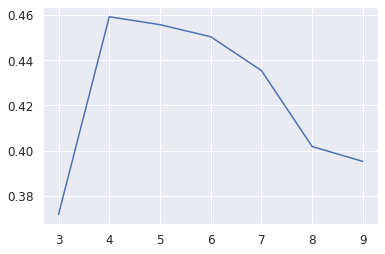

In [0]:
pd.Series(score).plot()

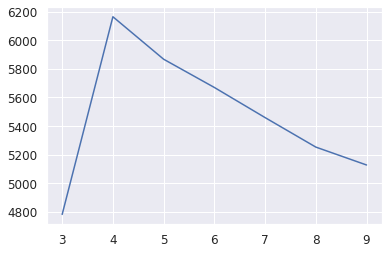

In [0]:
pd.Series(score_c).plot()

**Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.**



***Insights with 4 Clusters***



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. ***This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side ***This group is about 21% of the total customer base***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases.*** This group is about 25% of the total customer base***



### Marketing Strategy Suggested:

#### a. Group 2
   -They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
#### c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
#### d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.

In [0]:
marks=km_score.score(X=reduced_cr, y=None, sample_weight=None)


In [0]:
print(marks)

-23881.68879659417


### Score of Kemans 

### This value tells how internally coherent the clusters are. (The less the better)

In [0]:
cr_dummy.to_csv('reduced_df.csv') 

In [0]:
cluster_df_4.head

<bound method NDFrame.head of       PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0                 2              7.950000              0.000000     0.040901   
1                 0              0.000000            536.912124     0.457495   
2                12             64.430833              0.000000     0.332687   
3                 1            124.916667             17.149001     0.222223   
4                 1              1.333333              0.000000     0.681429   
...             ...                   ...                   ...          ...   
8945              6             48.520000              0.000000     0.028494   
8946              6             50.000000              0.000000     0.019183   
8947              5             24.066667              0.000000     0.023399   
8948              0              0.000000              6.093130     0.026915   
8949             23            182.208333             21.173335     0.310590   

      CAS

In [0]:
email_id = pd.Series([]) 
for i in range(len(cluster_df_4)): 
    if cluster_df_4["Cluster_4"][i] == 0: 
        email_id[i]="s.boopesh@gmail.com"
  
    elif cluster_df_4["Cluster_4"][i] == 1: 
        email_id[i]="boopesh.s2016@vitstudent.ac.in"
  
    elif cluster_df_4["Cluster_4"][i] == 2: 
        email_id[i]="s.boopesh@outlook.com"

    else: 
        email_id[i]= "s.boopeshthala@rocketmail.com" 
cluster_df_4.insert(12, "E-Mail", email_id)         

In [0]:
cluster_df_4.head

<bound method NDFrame.head of       PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0                 2              7.950000              0.000000     0.040901   
1                 0              0.000000            536.912124     0.457495   
2                12             64.430833              0.000000     0.332687   
3                 1            124.916667             17.149001     0.222223   
4                 1              1.333333              0.000000     0.681429   
...             ...                   ...                   ...          ...   
8945              6             48.520000              0.000000     0.028494   
8946              6             50.000000              0.000000     0.019183   
8947              5             24.066667              0.000000     0.023399   
8948              0              0.000000              6.093130     0.026915   
8949             23            182.208333             21.173335     0.310590   

      CAS

In [0]:
ad_email=cluster_df_4[['Cluster_4','E-Mail']].copy()

In [0]:
ad_email.head

<bound method NDFrame.head of       Cluster_4                          E-Mail
0             1  boopesh.s2016@vitstudent.ac.in
1             3   s.boopeshthala@rocketmail.com
2             2           s.boopesh@outlook.com
3             2           s.boopesh@outlook.com
4             2           s.boopesh@outlook.com
...         ...                             ...
8945          1  boopesh.s2016@vitstudent.ac.in
8946          1  boopesh.s2016@vitstudent.ac.in
8947          1  boopesh.s2016@vitstudent.ac.in
8948          3   s.boopeshthala@rocketmail.com
8949          2           s.boopesh@outlook.com

[8950 rows x 2 columns]>

In [0]:
cluster_mail = ad_email.groupby('Cluster_4')

In [0]:
cluster_mail.first()

,E-Mail
Cluster_4,
0,s.boopesh@gmail.com
1,boopesh.s2016@vitstudent.ac.in
2,s.boopesh@outlook.com
3,s.boopeshthala@rocketmail.com


In [0]:
cluster_mail.get_group(0).to_csv('cluster 0.csv') 
cluster_mail.get_group(1).to_csv('cluster 1.csv') 
cluster_mail.get_group(2).to_csv('cluster 2.csv') 
cluster_mail.get_group(3).to_csv('cluster 3.csv') 